## Project 2 : Customer Segmentation Analysis
**Author:** Neha Tiwari

---
## Project Overview

This project aims to segment customers of an e-commerce company using clustering techniques to uncover meaningful groups for targeted marketing and business strategies.

**1. Import Libraries**

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import os
os.environ["OMP_NUM_THREADS"] = "4"  # You can adjust to 4, 6, or your system's core count
import warnings
warnings.filterwarnings("ignore", category=UserWarning)



**2. Load the Dataset**

In [2]:
df = pd.read_csv("ifood_df.csv")
df.head()


,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


**3. Explore the Data**

In [3]:
df.info()
df.describe()
df.isnull().sum()  # Check for missing values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

Income                  0
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
Customer_Days           0
marital_Divorced        0
marital_Married         0
marital_Single          0
marital_Together        0
marital_Widow           0
education_2n Cycle      0
education_Basic         0
education_Graduation    0
education_Master        0
education_PhD           0
MntTotal                0
MntRegularProds         0
AcceptedCmpO

 **4. Clean the Data**

In [5]:
# Drop constant or irrelevant columns if present
df = df.drop(['Z_CostContact', 'Z_Revenue'], axis=1)

# Drop columns not needed for clustering (if any)
df = df.drop(['CustomerID', 'Name'], axis=1, errors='ignore')


**5. Feature Selection for Clustering**

In [6]:
selected_features = [
    'Income', 'Recency', 'Age', 'Kidhome', 'Teenhome',
    'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
    'MntSweetProducts', 'MntGoldProds', 'MntTotal', 'MntRegularProds',
    'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
    'NumStorePurchases', 'NumWebVisitsMonth',
    'AcceptedCmpOverall', 'Customer_Days'
]

df_seg = df[selected_features]


 **6. Data Standardization**

In [7]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_seg)


 **7. Determine Optimal Number of Clusters (Elbow Method)**

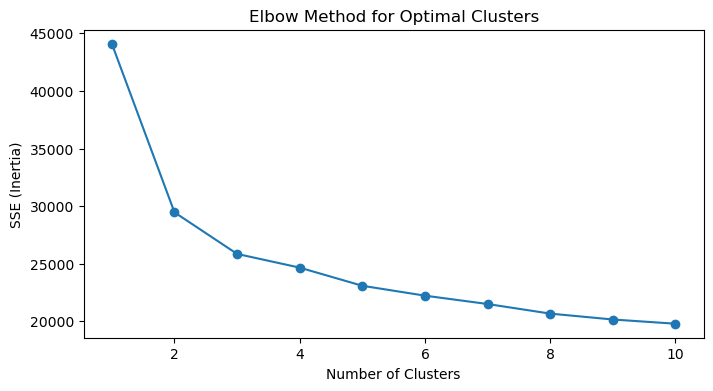

In [11]:
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE (Inertia)')
plt.title('Elbow Method for Optimal Clusters')
plt.show()


**8. Apply K-Means Clustering**

In [18]:
kmeans = KMeans(n_clusters=4, random_state=42)  # Use optimal k from elbow curve
df['Cluster'] = kmeans.fit_predict(df_scaled)


**9. Visualize Clusters (PCA for 2D Plot)**

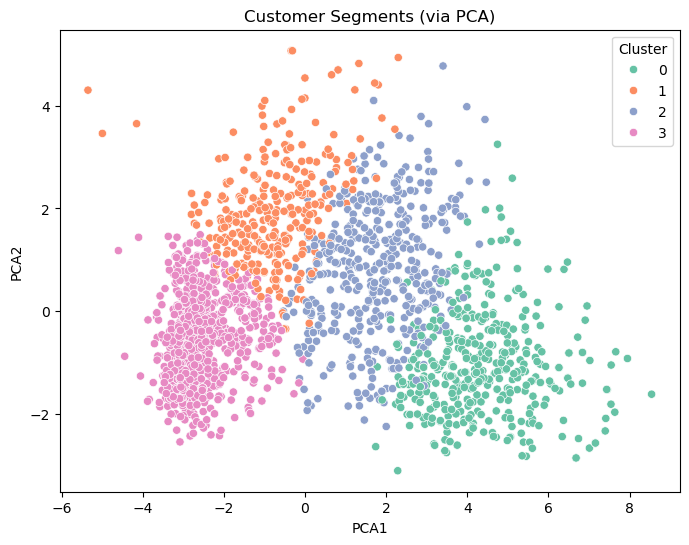

In [15]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(df_scaled)
df['PCA1'] = reduced_data[:, 0]
df['PCA2'] = reduced_data[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='Set2')
plt.title('Customer Segments (via PCA)')
plt.show()


**10. Analyze Cluster Characteristics**

In [16]:
cluster_summary = df.groupby('Cluster')[selected_features].mean().round(2)
print(cluster_summary)


           Income  Recency    Age  Kidhome  Teenhome  MntWines  MntFruits  \
Cluster                                                                     
0        77989.07    49.57  50.84     0.03      0.11    674.65      68.25   
1        48628.51    48.15  54.35     0.54      0.92    286.89      10.75   
2        64590.89    49.02  54.93     0.08      0.75    519.18      41.75   
3        33976.01    49.04  48.17     0.78      0.43     35.83       4.79   

         MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
Cluster                                                                     
0                 509.74           106.87             74.47         76.61   
1                  83.18            17.50             11.99         52.08   
2                 193.19            49.94             38.54         67.70   
3                  20.66             6.73              4.78         14.39   

         MntTotal  MntRegularProds  NumDealsPurchases  NumWebPurchases  \


## 🔍 Insights and Recommendations

After performing K-Means clustering on customer behavioral data, we identified **4 distinct customer segments**. Each cluster displays unique characteristics in terms of spending habits, income, engagement, and response to marketing. Below is the detailed analysis:

---

### 🔵 Cluster 0 – Premium Loyal Shoppers
**Characteristics:**
- Highest average income (~₹77,989)
- Highest overall spending (~₹1433)
- Strong spending on wines, meat, and gold products
- High number of store and catalog purchases
- Low website visits, indicating product satisfaction
- High campaign acceptance (0.86)

**Recommendations:**
- Prioritize with **premium loyalty programs**
- Offer **exclusive deals and early access** to luxury products
- Launch **personalized marketing** campaigns to deepen brand loyalty
- Consider offering **subscription boxes** for preferred product categories

---

### 🟡 Cluster 1 – Price-Conscious Families
**Characteristics:**
- Low-to-mid income group (~₹48,628)
- Highest number of children at home
- Moderate product purchases (₹410)
- Very high deal usage (5.08)
- Frequent website visits (6.98)
- Low campaign acceptance (0.22)

**Recommendations:**
- Focus on **value packs**, **bundle offers**, and **seasonal discounts**
- Optimize **web content and offers** for returning visitors
- Promote **family-oriented promotions** or bulk purchase incentives
- Campaigns should highlight **savings** and **necessity-based products**

---

### 🟢 Cluster 2 – Comfortable Digital Buyers
**Characteristics:**
- Mid-high income (~₹64,590)
- Moderate spending (₹842), especially on wine and meat
- High use of web, store, and catalog purchase channels
- Average engagement with campaigns (0.27)

**Recommendations:**
- Provide **multi-channel touchpoints** (email, web, app)
- Offer **customized product suggestions** based on past behavior
- Promote **membership tiers** or cross-sell higher-margin items
- Encourage with **personalized promotions**

---

### 🔴 Cluster 3 – Low-Value Minimalists
**Characteristics:**
- Lowest income (~₹33,976)
- Low spending (~₹72)
- Low product and channel engagement
- High web visits but low purchases
- Almost no response to marketing campaigns

**Recommendations:**
- Focus on **basic product categories** or **entry-level offers**
- Use **trial products**, **referral incentives**, or **free delivery**
- May not be worth targeting with high-cost campaigns
- Re-engage selectively using **data-driven retargeting**

---

## 📌 Final Strategy Summary

| Cluster | Targeting Strategy               | Priority |
|---------|----------------------------------|----------|
| 0       | Premium loyalty & exclusivity    | 🔥 High   |
| 1       | Discounts & family offers        | ✅ Medium |
| 2       | Personalization & cross-selling  | ✅ Medium |
| 3       | Retargeting or exclude           | ❌ Low    |
